In [42]:

import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

import keras.models
import keras.layers

In [43]:
Ravdess = "/home/kenterbery/projects/speech_emotion_recognition/input/Ravdess/audio_speech_actors_01-24/"
Crema = "/home/kenterbery/projects/speech_emotion_recognition/input/Crema/"
Savee = "/home/kenterbery/projects/speech_emotion_recognition/input/Savee/"
Tess = "/home/kenterbery/projects/speech_emotion_recognition/input/Tess/"

Ravdess dataset

In [44]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, Ravdess + dir + "/" + wav))

In [45]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

In [46]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


Crema dataset


In [47]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + wav))
    else:
        emotion_df.append(("unknown", Crema + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

,Emotion,Path
0,disgust,/home/kenterbery/projects/speech_emotion_recog...
1,happy,/home/kenterbery/projects/speech_emotion_recog...
2,sad,/home/kenterbery/projects/speech_emotion_recog...
3,happy,/home/kenterbery/projects/speech_emotion_recog...
4,neutral,/home/kenterbery/projects/speech_emotion_recog...


TESS dataset

In [48]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(Tess + dir):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", Tess + dir + "/" + wav))
        else:
            emotion_df.append((emo, Tess + dir + "/" + wav))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df.head()

,Emotion,Path
0,sad,/home/kenterbery/projects/speech_emotion_recog...
1,sad,/home/kenterbery/projects/speech_emotion_recog...
2,sad,/home/kenterbery/projects/speech_emotion_recog...
3,sad,/home/kenterbery/projects/speech_emotion_recog...
4,sad,/home/kenterbery/projects/speech_emotion_recog...


In [49]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + wav))
    else:
        emotion_df.append(("surprise", Savee + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()

,Emotion,Path
0,sad,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,angry,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


In [50]:
df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
df.shape

(12162, 2)

In [51]:
df.head()

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


In [52]:
%matplotlib inline

plt.style.use("ggplot")

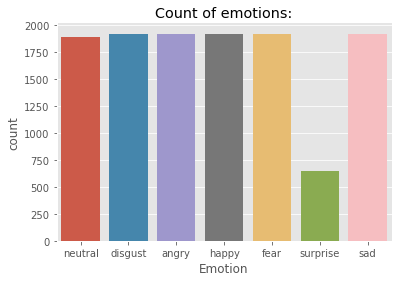

In [53]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [54]:
df.head(10)

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...
5,angry,/home/kenterbery/projects/speech_emotion_recog...
6,angry,/home/kenterbery/projects/speech_emotion_recog...
7,happy,/home/kenterbery/projects/speech_emotion_recog...
8,fear,/home/kenterbery/projects/speech_emotion_recog...
9,angry,/home/kenterbery/projects/speech_emotion_recog...


In [78]:
def create_spectrogram_plot(data, output_path):
    # X = librosa.stft(data)
    # Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

    # For plotting headlessly
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
    # fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    # ax = fig.add_subplot(111)
    # librosa.display.specshow(Xdb, cmap="gray_r")
    # fig.savefig(output_path)

    fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(Xdb, ax=ax, cmap="magma",)
    fig.savefig(output_path,  bbox_inches='tight', pad_inches=0)
#
#
def create_spectrogram(data, sr):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

    return Xdb

def get_mel_spectrogram(data, sr):
    melspec = librosa.feature.melspectrogram(data, sr=sr, n_mels=128)
    melspec = librosa.power_to_db(melspec).astype(np.float32)

    return melspec

In [ ]:
def fill_to_same_shape(mel):
    t = np.pad(mel, ((0,0),(0,3)), mode='constant', constant_values=-99)
    librosa.display.specshow(t, x_axis="time", y_axis="mel", sr=sample_rate, cmap="magma")
    t

In [80]:
mel_df = []

print("Start processing...")

for i in range(df.shape[0]):
    path = df.Path.iloc[i]
    emotion = df.Emotion.iloc[i]

    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    mel_spec = get_mel_spectrogram(data, sr)
    mel_df.append(("emotion", mel_spec))

    if i+1 % 500 == 0:
        print(f"{i} samples has been processed...")

print("Done.")


Start processing...


KeyboardInterrupt: 